In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt
from scipy.ndimage import convolve
import cv2 as cv
import os
import glob

In this question i implemented low pass and high pass filters and after that combined two images

In [ ]:
first = cv.imread('first.png', 0)
second = cv.imread('second.png', 0)

In this code, a circular mask is created with high frequencies set to one, effectively allowing only the low frequencies to pass through.the radius is setted with 20 to best performance.

In [ ]:
def low_pass(image, r = 20):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.ones((rows, cols), np.uint8)
    mask[crow - r:crow + r, ccol - r:ccol + r] = 0
    fshift_filtered = fshift * mask
    
    f_ishift = np.fft.ifftshift(fshift_filtered)
    filtered_image = np.fft.ifft2(f_ishift)
    filtered_image = np.abs(filtered_image)
    filtered_image = filtered_image.astype(np.uint8)
    return filtered_image

In this code, a circular mask is created with low frequencies set to zero, effectively allowing only the high frequencies to pass through.the radius is setted with 20 to best performance.

In [ ]:
def high_pass(image, r = 20):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - r:crow + r, ccol - r:ccol + r] = 1

    fshift_filtered = fshift * mask

    f_ishift = np.fft.ifftshift(fshift_filtered)
    filtered_image = np.fft.ifft2(f_ishift)
    filtered_image = np.abs(filtered_image)
    filtered_image = filtered_image.astype(np.uint8)
    return filtered_image


In [ ]:
def combination(low_image, high_image):    
    comb = 1.5 * low_image + high_image
    ft = np.fft.fft2(comb)
    ft_shift = np.fft.fftshift(ft)
    magnitude = np.log(1 + np.abs(ft_shift))

    return magnitude, comb

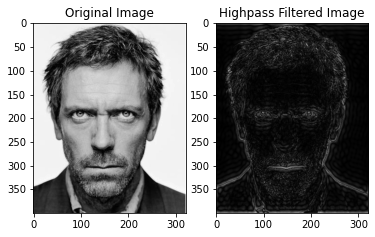

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(first, cmap = 'gray')
ax1.title.set_text("Original Image")
ax2.imshow(low_pass(first), cmap='gray')
ax2.title.set_text("Lowpass Filtered Image")
plt.show()

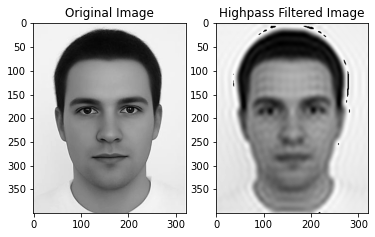

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(second, cmap = 'gray')
ax1.title.set_text("Original Image")
ax2.imshow(high_pass(second), cmap='gray')
ax2.title.set_text("Highpass Filtered Image")
plt.show()

In [ ]:
_ , comb_img = combination(low_pass(first), high_pass(second))

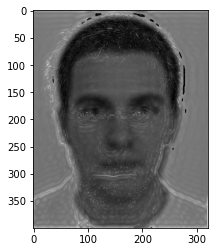

In [ ]:
plt.imshow(comb_img, cmap='gray')